# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js
import random
import math
import functools
from functools import cmp_to_key




class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


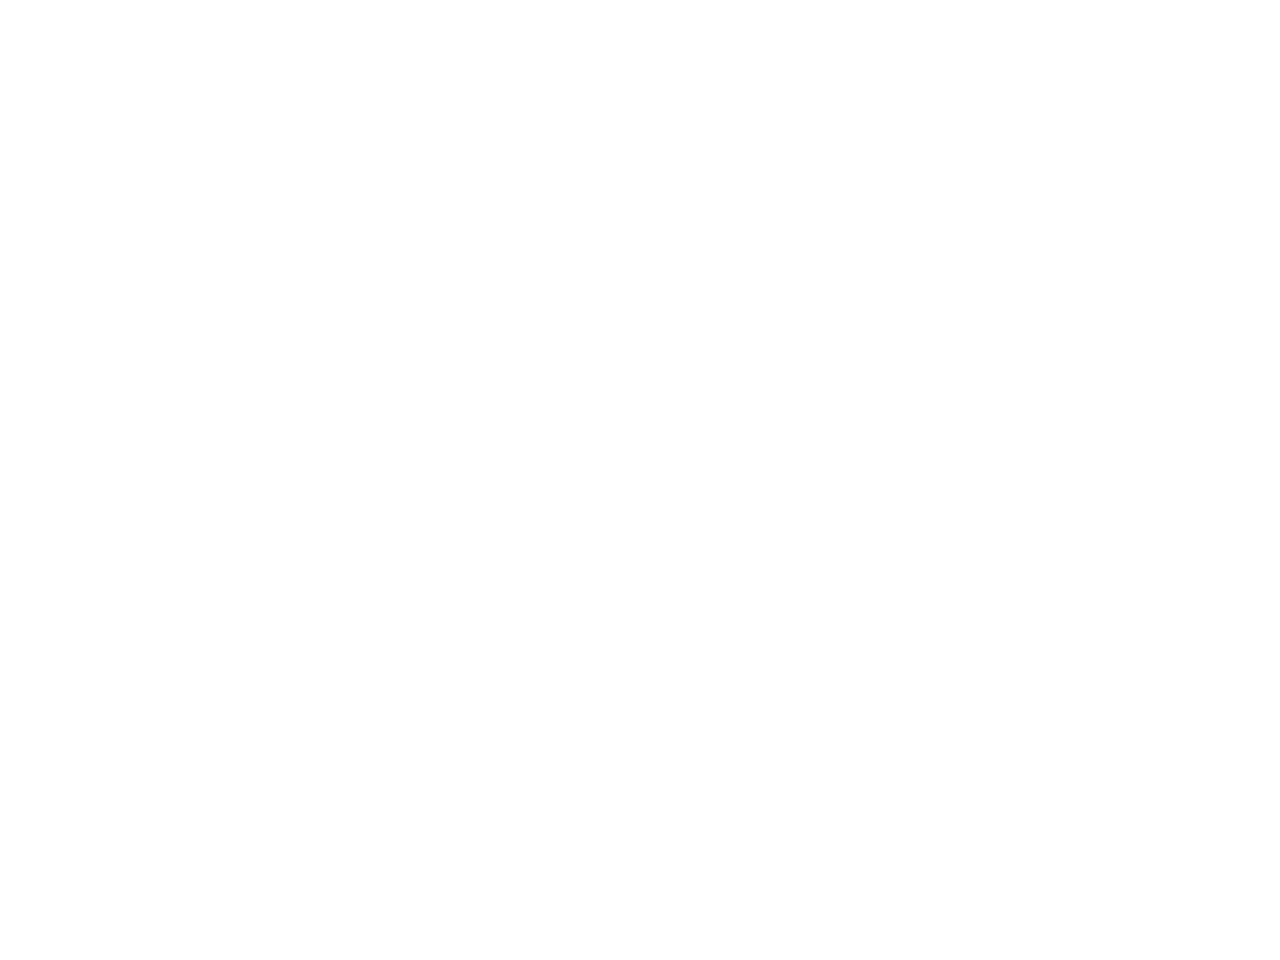

'[{"points": [[[1.0, 2.0], [3.0, 1.5], [2.0, -1.0]], [[5, -2], [2, 2], [-2, -1]]], "lines": [[[[1, 2], [2, 3]], [[0, 1], [1, 0]]]]}, {"points": [[[1.0, 2.0], [-15.0, 1.5], [2.0, -1.0]], [[5, -2], [2, 2], [-2, 1]]], "lines": [[[[-1, 2], [-2, 3]], [[0, -1], [-1, 0]]]]}]'

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 
plot.toJSON()


### Rozwiązanie

zad 1 i 3 : funkcje generujące zbiory punktów, przyjmujące odpowiednie parametry

In [4]:
def get_random(min_range,max_range):
    return random.uniform(min_range,max_range)

def rand_from_range(min_range,max_range,amount):
    points = []
    for i in range(0,amount):
        points.append((get_random(min_range,max_range), get_random(min_range,max_range)))
    return points    
        
def rand_on_circle(x,y,r,amount):
    
    points = []
    for i in range(0,amount):
        angle=get_random(0, 2*math.pi)
        points.append((x + r*math.cos(angle), y+ r*math.sin(angle)))
    return points  

def rand_on_square(left_up,left_down,right_down,right_up,amount):
    points = []
    for i in range(0,amount):
        side = random.randint(0,3)
        if side == 0 :
            points.append((left_up[0], get_random(left_down[1], left_up[1])))
        if side == 1 :
            points.append((get_random(left_down[0], right_down[0]), left_down[1]))
        if side == 2 :
            points.append((right_down[0], get_random(right_down[1], right_up[1])))
        if side == 3 :
            points.append((get_random(left_up[0], right_up[0]), right_up[1]))
    return points   

def rand_quad (left_up, left_down, right_down, right_up, on_axis, on_diagonal):
    points = []
    points.append(left_up)
    points.append(left_down)
    points.append(right_down)
    points.append(right_up)
    for i in range(0,on_axis):
        points.append((left_up[0], get_random(left_down[1], left_up[1])))
        points.append((get_random(left_down[0], right_down[0]), left_down[1]))
   
    for i in range(0,on_diagonal):    
        x=get_random(left_down[0], right_up[0])
        points.append((x,x))
        
    for i in range(0,on_diagonal):
        x=get_random(left_up[0], right_down[0])
        points.append((x,left_up[1]-x))
    return points  

Wizualizacja graficzna wygenerowanych zbiorów :

In [5]:
%matplotlib notebook

pointsA=rand_from_range(-100,100,100)
pointsB=rand_on_circle(0,0,10,100)
pointsC = rand_on_square((-10,10),(-10,-10), (10,-10), (10,10), 100)
pointsD=rand_quad((0,10),(0,0),(10,0),(10,10),25,20)

# scenes=[Scene([PointsCollection(pointsA)]),
#         Scene([PointsCollection(pointsB)]),
#         Scene([PointsCollection(pointsC)]),
#         Scene([PointsCollection(pointsD)])]
# plot=Plot(scenes)
# plot.draw()

# Alorytm Jarvisa

funkcje pomocnicze :
    orient - wyznacza połozenie punktu wzgl prostej na podstawie wyznacznika 3x3 
    dist - zwraca odległość dwóch punktów
    nextPoint - wyznacza kolejny, najbardziej wysunięty na prawo punkt od punkt o najmniejszym y w zbiorze

In [6]:
import time

def orient(p,q,r, epsilon=10 **(-12)):   
    determinant = p[0] * q[1] + p[1] * r[0] + q[0] * r[1] - q[1] * r[0] - p[0] * r[1] - p[1] * q[0]    
    if abs(determinant) > epsilon:
        if determinant > 0 :
                return 1
        else : return -1        
    if abs(determinant) < epsilon:
            return 0   
        
def dist(p,q):
    return (q[0]-p[0]) ** 2 + (q[1]-p[1]) ** 2

def nextPoint (points,p):
    q=p
    for i in points:
        t = orient(p,q,i,epsilon=10**(-10))
        if t == -1 or (t == 0 and dist(p,i) > dist(p,q)):
            q=i
    return q

def jarvis(points):
    firstPoint=min(points, key=lambda x : (x[1],x[0]))
    stack=[firstPoint]
        
    for i,p in enumerate(stack):
        q=nextPoint(points,p)
        if q!=stack[0]:
            stack.append(q)    

    return stack

In [7]:
def writeToFile(points,file):
    file.write('\n'.join('{} {}'.format(x[0],x[1]) for x in points))
    file.write('\n')
    

funkcja tworzy tablicę zawierającą krawędzie otoczki

In [8]:
def create_lines(points):
    lin=[[]*2 for i in range(0,len(points)-1)]
    for i in range(0,len(points)-1):
             lin.append([points[i],points[i+1]])  
    lin.append([points[0], points[len(points)-1]])        
    lin=[x for x in lines if x!=[]]
    return lin

Wizualizacja algorytmu Jarvisa wraz z czasem działania algorytmu dla kolejnych zbiorów

In [9]:
# %matplotlib notebook
# file=open('JarvisResult.txt', 'w')


# pA=jarvis(pointsA)
# pB=jarvis(pointsB)
# pC=jarvis(pointsC)
# pD=jarvis(pointsD)

# file.write("ZBIOR 1 \n")
# writeToFile(pA, file)
# file.write("ZBIOR 2 \n")
# writeToFile(pB, file)
# file.write("ZBIOR 3 \n")
# writeToFile(pC, file)
# file.write("ZBIOR 4 \n")
# writeToFile(pD, file)


# scenes=[Scene([PointsCollection(pointsA), PointsCollection(pA)], [LinesCollection(create_lines(pA),color='orange')]),
#         Scene([PointsCollection(pointsB), PointsCollection(pB)], [LinesCollection(create_lines(pB),color='orange')]),
#         Scene([PointsCollection(pointsC), PointsCollection(pC)], [LinesCollection(create_lines(pC),color='orange')]),
#         Scene([PointsCollection(pointsD), PointsCollection(pD)], [LinesCollection(create_lines(pD),color='orange')])]
# plot=Plot(scenes)
# plot.draw()

# Wizualizacja graficzna algorymu Jarvisa krok po kroku

kolor szary - zbiór punktów
kolor różowy - punkty otoczki wypukłej
kolor pomarańczowy - punkt aktualnie rozpatrywany

In [10]:
# %matplotlib notebook

# def jarvisDraw(points):
#     if len(points)<=3:
#         return points
#     pts=points.copy()
#     firstPoint=min(pts, key=lambda x : (x[1],x[0]))
#     pts=[x for x in pts if x[0]!=firstPoint[0] or x[1]!=firstPoint[1]]
#     result=[firstPoint]
#     q=nextPoint(pts,firstPoint)
#     pts=[x for x in pts if x!=q]
#     result.append(q)
#     pts.append(firstPoint)
#     scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet')]))
#     q=nextPoint(pts,q)
#     pts=[x for x in pts if x!=q]
#     while q!=firstPoint:
#         scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet'), 
#                                  PointsCollection([q], color='orange')]))
#         result.append(q)
#         q=nextPoint(pts,q)
#         scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet')]))
#     return result


In [15]:
%matplotlib notebook

def jarvisDraw1(points):
   # if len(points)<=3:
    #    return points
   # sc = []
    p=points.copy()
    firstPoint=min(p, key=lambda x : (x[1],x[0]))
    pts=[x for x in p if x[0]!=firstPoint[0] or x[1]!=firstPoint[1]]
    result=[firstPoint]
    q=nextPoint(p,firstPoint)
    p=[x for x in pts if x!=q]
    result.append(q) 
    l=[(firstPoint,q)]
   
    p.append(firstPoint)
    
#     print(l)
    
    sc.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet')], 
                        [LinesCollection(l, color = 'pink')]))
    
    q=nextPoint(p,q)
    p=[x for x in p if x!=q]
    while q!=firstPoint:
#           print(l)
            sc.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet'), 
                                 PointsCollection([q], color='orange')], 
                                [LinesCollection(l,color='pink'),LinesCollection([[result[-1],q]], color='red')]))
            l.append((result[-1],q))  
            result.append(q)           
            q=nextPoint(p,q)
            p=[x for x in p if x!=q]
    l.append((result[0], result[len(result)-1]))  
    sc.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet')],
                           [LinesCollection(l,color='pink'),LinesCollection([[result[0],result[len(result)-1]]], color='red')]))
                             
    return sc
  

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


<IPython.core.display.Javascript object>


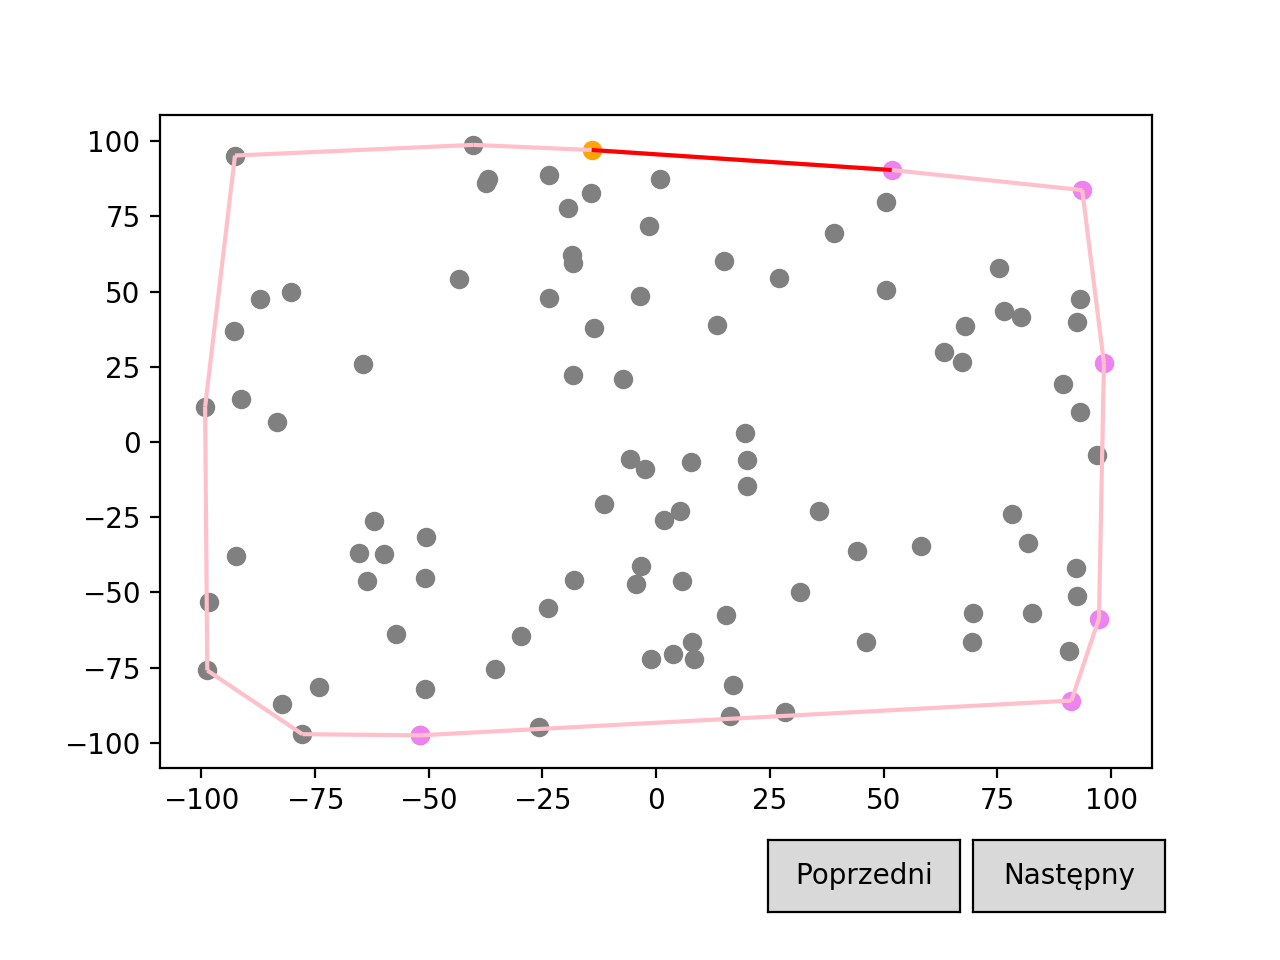

In [19]:
sc =[]
s = []
s = jarvisDraw1(pointsA)
result = map(lambda l: len(l.lines), s)
print(list(result))

plot2=Plot(s)
plot2.draw()

<IPython.core.display.Javascript object>


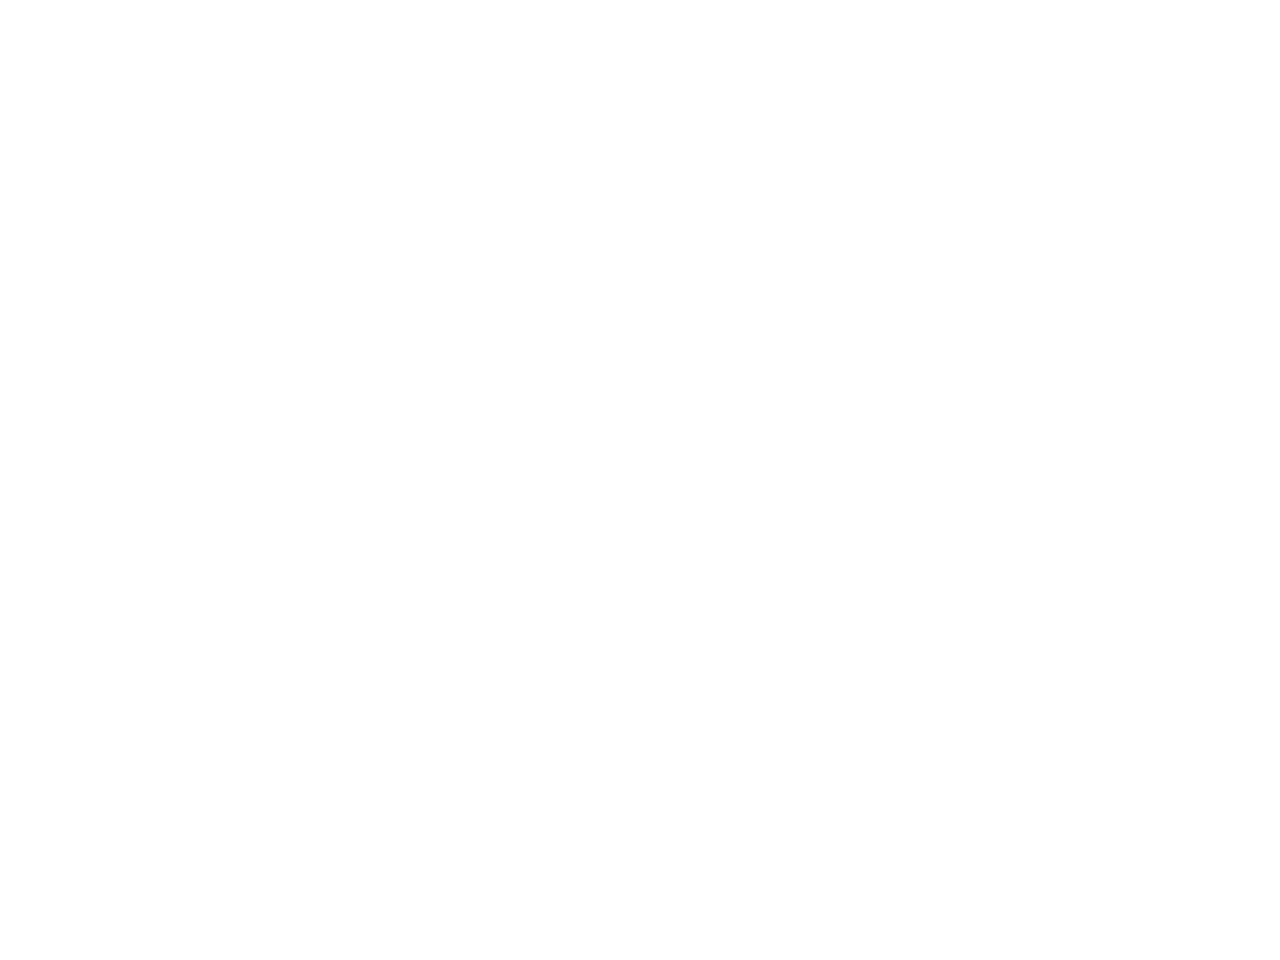

In [13]:
sc = jarvisDraw1(pointsB)
# jarvisDraw1(pointsB)
plot=Plot(sc)
plot.draw()

Zbiór 1

In [14]:
scenes = []
result=jarvisDraw(pointsA)
plot=Plot(scenes)
plot.draw()

NameError: name 'jarvisDraw' is not defined

In [ ]:
scenes = []
jarvisDraw1(pointsC)
plot=Plot(scenes)
plot.draw()

In [ ]:
scenes = []
jarvisDraw1(pointsD)
plot=Plot(scenes)
plot.draw()

Zbiór 2

In [ ]:
scenes = []
result=jarvisDraw(pointsB)
plot=Plot(scenes)
plot.draw()

Zbiór 3

In [ ]:
scenes = []
result=jarvisDraw(pointsC)
plot=Plot(scenes)
plot.draw()

Zbiór 4

In [ ]:
scenes = []
result=jarvisDraw(pointsD)
plot=Plot(scenes)
plot.draw()

Algorytm Grahama i funkcje pomocnicze :
    compare - funckcja sortująca punkty względem kąta jaki tworzy wektor (minPoint,p) z dodatnim kierunkiem osi x.

In [ ]:
def compare(minPoint):
    def cmp(p,q):
        if orient(minPoint,p,q, epsilon=10**(-10))==1: return -1
        if orient(minPoint,p,q,epsilon=10**(-10))==-1 : return 1
        else :
            if dist(minPoint,p) < dist(minPoint,q): return -1
            else : return 1
    return cmp  

In [ ]:
def graham(points):
    minPoint = min(points, key=lambda x : (x[1],x[0]))
    points=[x for x in points if x[0]!=minPoint[0] or x[1]!=minPoint[1]]
    points=sorted(points, key=cmp_to_key(compare(minPoint)))
    stack = [minPoint,points[0],points[1]]

    i=3
    for i in range(2,len(points)):
        p=points[i]
        while len(stack)>1 and  orient(stack[-2], stack[-1], p, epsilon=10**(-10)) !=1:
            stack.pop()
        else :
            stack.append(p)
            i+=1      
    return stack                        

Wizualizacja algorymtu Graham wraz z czasem działania algorytmu dla kolejnych zbiorów

In [ ]:
%matplotlib notebook

file=open('GrahamResult.txt', 'w')

pA=graham(pointsA)
pB=graham(pointsB)
pC=graham(pointsC)
pD=graham(pointsD)

file.write("ZBIOR 1 \n")
writeToFile(pA, file)
file.write("ZBIOR 2 \n")
writeToFile(pB, file)
file.write("ZBIOR 3 \n")
writeToFile(pC, file)
file.write("ZBIOR 4 \n")
writeToFile(pD, file)

scenes=[Scene([PointsCollection(pointsA), PointsCollection(pA)], [LinesCollection(lines(pA),color='orange')]),
        Scene([PointsCollection(pointsB), PointsCollection(pB)], [LinesCollection(lines(pB),color='orange')]),
        Scene([PointsCollection(pointsC), PointsCollection(pC)], [LinesCollection(lines(pC),color='orange')]),
        Scene([PointsCollection(pointsD), PointsCollection(pD)], [LinesCollection(lines(pD),color='orange')])]
plot=Plot(scenes)
plot.draw()

# Wizualizacja algorytmu Grahama krok po kroku

In [ ]:
%matplotlib notebook


def grahamDraw1(points):
    firstPoint=min(points, key=lambda x : (x[1],x[0]))
    points=[x for x in points if x[0]!=firstPoint[0] or x[1]!=firstPoint[1]]
    p=sorted(points, key=cmp_to_key(compare(firstPoint)))
    lines=[]
    points.append(firstPoint)
    i=1
    result=[firstPoint,p[0]]
    lines.append((firstPoint,p[0]))
    scenes.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet')], 
                        [LinesCollection(lines, color='pink')]))
    while i <len(p):
        if len(result)< 2 or orient(result[-2],result[-1],p[i]) > 0:
            scenes.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result, color='violet'),
                                PointsCollection([p[i]], color='orange')],
                               [LinesCollection([[result[-1],p[i]]],color='pink'), 
                                LinesCollection(lines,color='pink')]))
            lines.append((result[-1], p[i]))
            result.append(p[i])
            
            i+=1
        else :
            scenes.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet'), 
                                 PointsCollection([p[i]], color='blue')],
                               [LinesCollection(lines,color='pink'),LinesCollection([[result[-1], p[i]]], color='pink')]))
            scenes.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet'),
                                PointsCollection([p[i]],color='blue'),PointsCollection([result[-1]], color='red')],
                               [LinesCollection(lines,color='pink'), LinesCollection([[p[i],result[-1]]], color='red')]))
            del result[-1]
            del lines[-1]
    lines.append((p[i-1], firstPoint))        
    scenes.append(Scene([PointsCollection(p,color='grey'), PointsCollection(result,color='violet')], 
                       [LinesCollection(lines,color='pink')]))
    return result

In [ ]:
scenes=[]
result=grahamDraw1(pointsA)
plot=Plot(scenes)
plot.draw()

In [ ]:
scenes=[]
result=grahamDraw1(pointsD)
plot=Plot(scenes)
plot.draw()

In [ ]:
%matplotlib notebook


def grahamDraw(points):
    firstPoint=min(points, key=lambda x : (x[1],x[0]))
    points=[x for x in points if x[0]!=firstPoint[0] or x[1]!=firstPoint[1]]
    pts=sorted(points, key=cmp_to_key(compare(firstPoint)))
    points.append(firstPoint)
    i=1
    result=[firstPoint,pts[0]]
    scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet')]))
    while i <len(pts):
        if len(result)< 2 or orient(result[-2],result[-1],pts[i]) > 0:
            scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result, color='violet'),
                                PointsCollection([pts[i]], color='orange')]))
            result.append(pts[i])
            i+=1
        else :
            scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet'), 
                                 PointsCollection([pts[i]], color='blue')]))
            scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet'),
                                PointsCollection([pts[i]],color='blue'),PointsCollection([result[-1]], color='red')]))
            del result[-1]
    scenes.append(Scene([PointsCollection(pts,color='grey'), PointsCollection(result,color='violet')]))
    return result


            
    

Zbiór 1

In [ ]:
scenes=[]
result=grahamDraw(pointsA)
plot=Plot(scenes)
plot.draw()

Zbiór 2

In [ ]:
scenes=[]
result=grahamDraw(pointsB)
plot=Plot(scenes)
plot.draw()
            

Zbiór 3

In [ ]:
scenes=[]
result=grahamDraw(pointsC)
plot=Plot(scenes)
plot.draw()

Zbiór 4

In [ ]:
scenes=[]
result=grahamDraw(pointsD)
plot=Plot(scenes)
plot.draw()

# Porównanie czasu działania

In [ ]:
def countTime(points):
    import time
    start_time = time.time()
    graham(points)
    print("Graham : %s sec" % (time.time() - start_time))

    start_time = time.time()
    jarvis(points)
    print("Jarvis: %s sec" % (time.time() - start_time))
 

In [ ]:
print("Zbiór 1 :")
countTime(pointsA)
print("Zbiór 2 :")
countTime(pointsB)
print("Zbiór 3 :")
countTime(pointsC)
print("Zbiór 4 :")
countTime(pointsD)